In [1]:
from mot_analysis.motimg import MOTImaging
# blue mot tof flight measurement
import os
import glob
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

Initialising plotting style...
Success! Plotting style initialised.
Initialising plotting style...
Success! Plotting style initialised.


Text(0.5, 1.0, 'Calibration curve for red beam power efficiency')

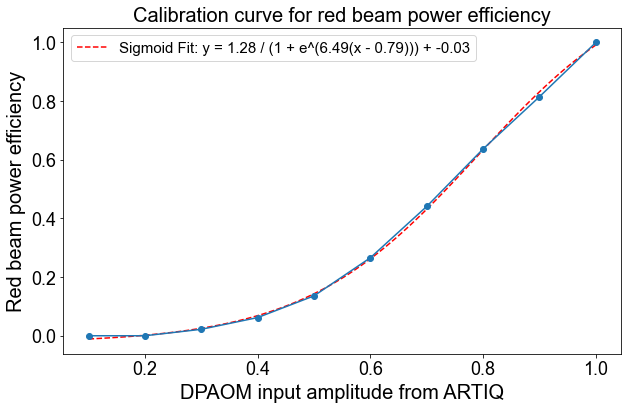

In [46]:
from scipy.optimize import curve_fit

amp = [1,0.9,0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
efficiency = [1, 0.815, 0.637, 0.441, 0.266, 0.136, 0.062, 0.022,0,0]

# fit the data with a sigmoid function for an acoustic optic modulator
def sigmoid_func(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

weights = np.ones_like(efficiency)
weights[:-5] = 0.1  # Give more weight to data points

popt_sigmoid, pcov_sigmoid = curve_fit(sigmoid_func, amp, efficiency)

# Plot the fitted sigmoid curve
x_fit_sigmoid = np.linspace(min(amp), max(amp), 100)
y_fit_sigmoid = sigmoid_func(x_fit_sigmoid, *popt_sigmoid)

plt.figure(figsize=(10,6))
plt.plot(x_fit_sigmoid, y_fit_sigmoid, 'r--', label=f'Sigmoid Fit: y = {popt_sigmoid[0]:.2f} / (1 + e^({popt_sigmoid[1]:.2f}(x - {popt_sigmoid[2]:.2f}))) + {popt_sigmoid[3]:.2f}')
plt.legend()

plt.plot(amp, efficiency, 'o-')
plt.xlabel('DPAOM input amplitude from ARTIQ',fontsize=20)
plt.ylabel('Red beam power efficiency',fontsize=20)
plt.title('Calibration curve for red beam power efficiency')

# Import and quick plot

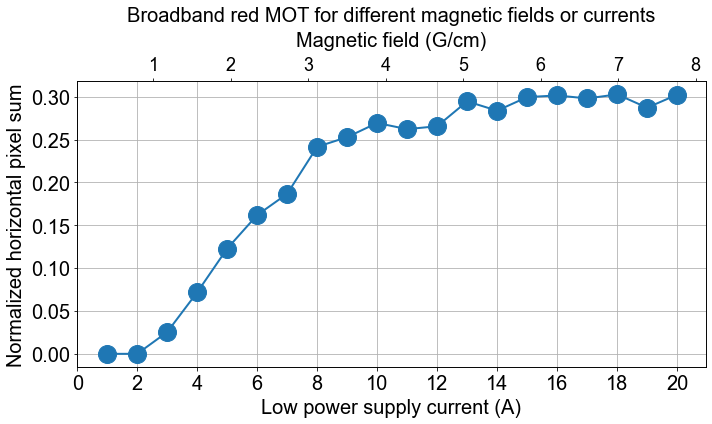

In [95]:
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_bfield\000016620-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16620.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16620.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/10,'o-', markersize=18, linewidth=2)
plt.xlabel('Low power supply current (A)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.xticks(np.linspace(0, 20, 11))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different magnetic fields or currents',fontsize=20,pad=10)
plt.grid(True)

magnetic_field = [i*0.388 for i in x_data]
ax2 = plt.twiny()
ax2.plot(magnetic_field, y_data/10, alpha=0)
ax2.set_xlabel('Magnetic field (G/cm)',fontsize=20,labelpad=10)

plt.tight_layout()
plt.savefig('Broadband red MOT for different magnetic fields.pdf', dpi=1200)

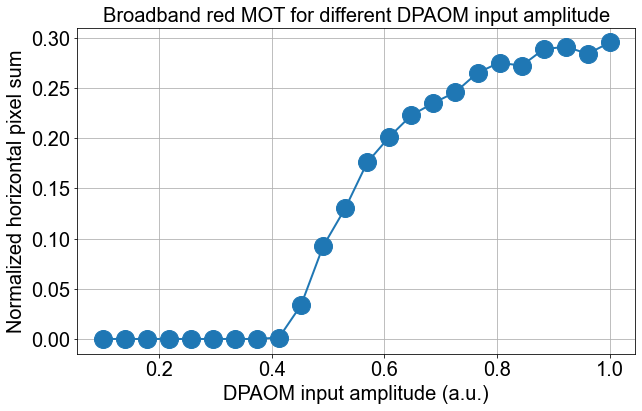

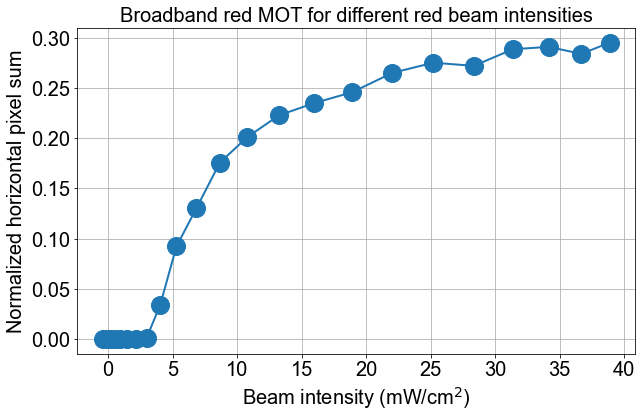

In [54]:
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_DPAOMamp\000016618-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16618.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16618.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/10,'o-', markersize=18, linewidth=2)
plt.xlabel('DPAOM input amplitude (a.u.)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different DPAOM input amplitude',fontsize=20)
# plt.legend(loc='upper left')
plt.grid(True)
# plt.savefig('Broadband red MOT for different DPAOM input amplitude.pdf', dpi=1200)

# convert the DPAOM amplitude to beam intensity and plot as second x-axis
beam_power = sigmoid_func(x_data, *popt_sigmoid) * 20.73
beam_intensity = 2*beam_power/(np.pi*0.58**2)
plt.figure(figsize=(10, 6))
plt.plot(beam_intensity, y_data/10,'o-', markersize=18, linewidth=2)
plt.xlabel(r'Beam intensity (mW/cm$^2$)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different red beam intensities',fontsize=20)
# plt.legend(loc='upper left')
plt.grid(True)

# plt.tight_layout()
# plt.savefig('Broadband red MOT for different red beam intensities.pdf', dpi=1200)

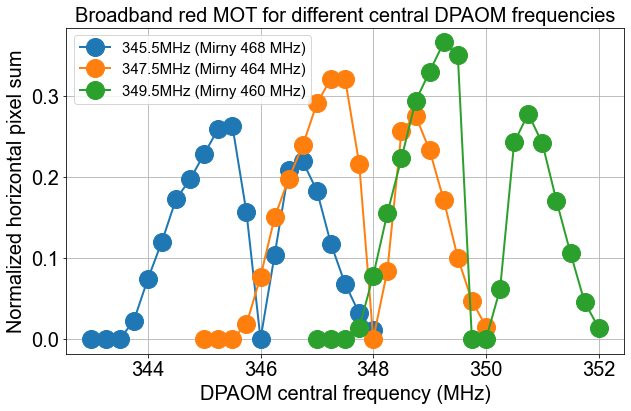

In [35]:
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3495MHz\000016609-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3495 = h5file['datasets/ndscan.rid_16609.points.axis_0'][:]
    y_data_3495 = h5file['datasets/ndscan.rid_16609.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3475MHzround2\000016612-MeasureRedMOT.h5"
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3475 = h5file['datasets/ndscan.rid_16612.points.axis_0'][:]
    y_data_3475 = h5file['datasets/ndscan.rid_16612.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3455MHz\000016614-MeasureRedMOT.h5"
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3455 = h5file['datasets/ndscan.rid_16614.points.axis_0'][:]
    y_data_3455 = h5file['datasets/ndscan.rid_16614.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data_3455/1e6, y_data_3455/10,'o-', markersize=18, linewidth=2, label='345.5MHz (Mirny 468 MHz)')
plt.plot(x_data_3475/1e6, y_data_3475/10,'o-', markersize=18, linewidth=2, label='347.5MHz (Mirny 464 MHz)')
plt.plot(x_data_3495/1e6, y_data_3495/10,'o-', markersize=18, linewidth=2, label='349.5MHz (Mirny 460 MHz)')
plt.xlabel('DPAOM central frequency (MHz)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different central DPAOM frequencies',fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
# plt.tight_layout()
plt.savefig('Broadband red MOT for different central DPAOM frequencies separate.pdf', dpi=1200)

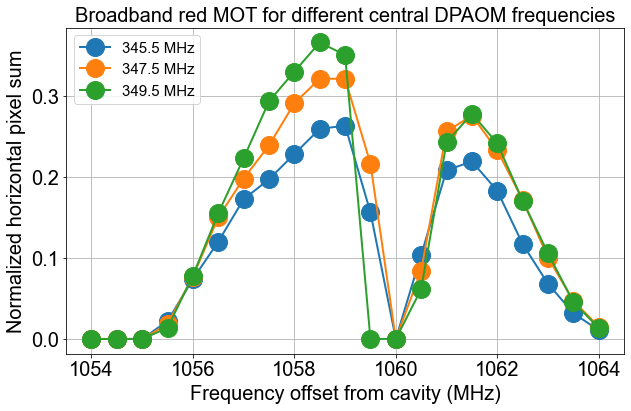

In [37]:
frequencyoffsetfromcavity = np.linspace(1054, 1064, 21)

plt.figure(figsize=(10, 6))
plt.plot(frequencyoffsetfromcavity, y_data_3455/10,'o-', markersize=18, linewidth=2, label='345.5 MHz')
plt.plot(frequencyoffsetfromcavity, y_data_3475/10,'o-', markersize=18, linewidth=2, label='347.5 MHz')
plt.plot(frequencyoffsetfromcavity, y_data_3495/10,'o-', markersize=18, linewidth=2, label='349.5 MHz')
plt.xlabel('Frequency offset from cavity (MHz)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different central DPAOM frequencies',fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
# plt.tight_layout()
plt.savefig('Broadband red MOT for different central DPAOM frequencies combined.pdf', dpi=1200)

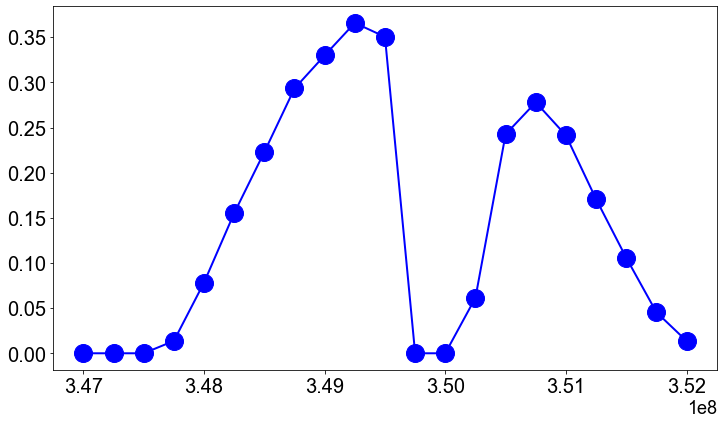

In [7]:
# file name and path
file_path = r"Z:\AION\Data\2024\11\05\bbredmot_mike_mariam_yj\DPAOMcentral3495MHz\000016609-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16609.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16609.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
# x_data = np.delete(x_data, 7)
# y_data = np.delete(y_data, 7)
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/10, 'o-', markersize=18, linewidth=2,color='blue')  # Large dots and connected points
# plt.title('atom transfer vs dpaom amplitude', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.xlabel('dpaom amplitude', fontsize=20)
# plt.ylabel('atom transfer horizontal camera', fontsize=20)
#plt.xlim(340, 360)
# plt.ylim(-0.05,0.82)
# plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
# Save the plot with 300 DPI
# plt.savefig('atomtransfer_vs_amplitude_20241013.png', dpi=300)

plt.show()

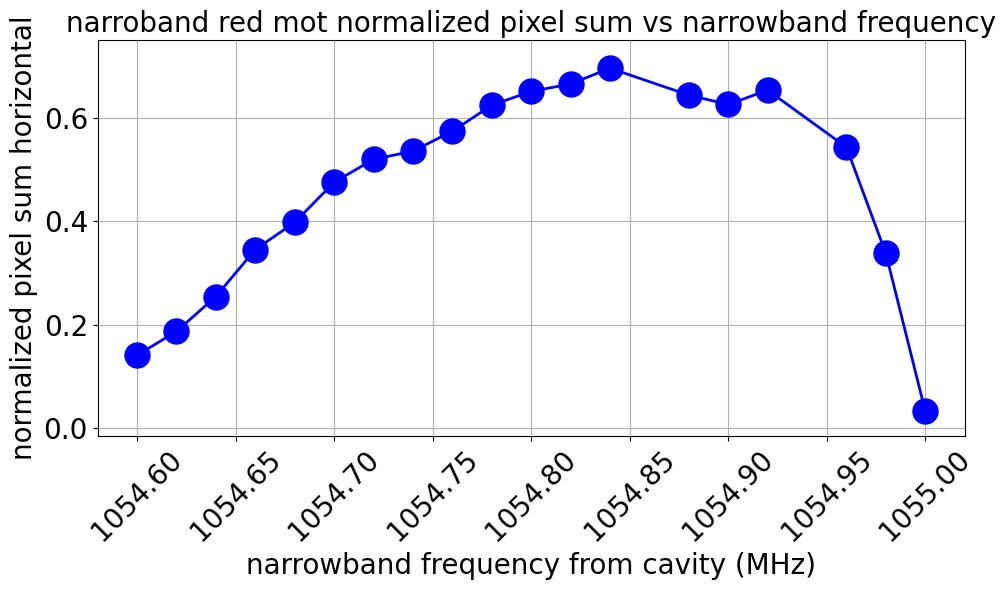

In [78]:
# file name and path
file_path = r"Z:\AION\Data\2024\10\13\narrowband_red_mot\ndscandata_redmot_narrowband_frequencyscan\000015621-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15621.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15621.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, 17)
y_data = np.delete(y_data, 17)
x_data = np.delete(x_data, 13)
y_data = np.delete(y_data, 13)
x_data = (x_data/1e6) *2 +460 -100
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/10, 'o-', markersize=18, linewidth=2,color='blue')  # Large dots and connected points
plt.title('narroband red mot normalized pixel sum vs narrowband frequency', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=45)
plt.xlabel('narrowband frequency from cavity (MHz)', fontsize=20)
plt.ylabel('normalized pixel sum horizontal', fontsize=20)
#plt.xlim(340, 360)
plt.ylim(-0.015,0.75)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
# Save the plot with 300 DPI
plt.savefig('narrowband_normalizedpixelsum_vs_frequency_0OFFSET_20241013_2.png', dpi=300)

plt.show()

In [67]:
x_list = []
y_list = []
label_list = []
# file name and path

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_fscan_duration0p1\000015810-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15810.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15810.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("0.1s")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_fscan_duration0p2\000015809-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15809.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15809.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, -2)
y_data = np.delete(y_data, -2)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("0.2s")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_fscan_duration0p4\000015811-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15811.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15811.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("0.4s")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_fscan_duration0p6\000015812-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15812.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15812.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("0.6s")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_fscan_duration0p8\000015813-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15813.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15813.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("0.8s")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_fscan_duration1\000015814-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15814.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15814.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("1.0s")

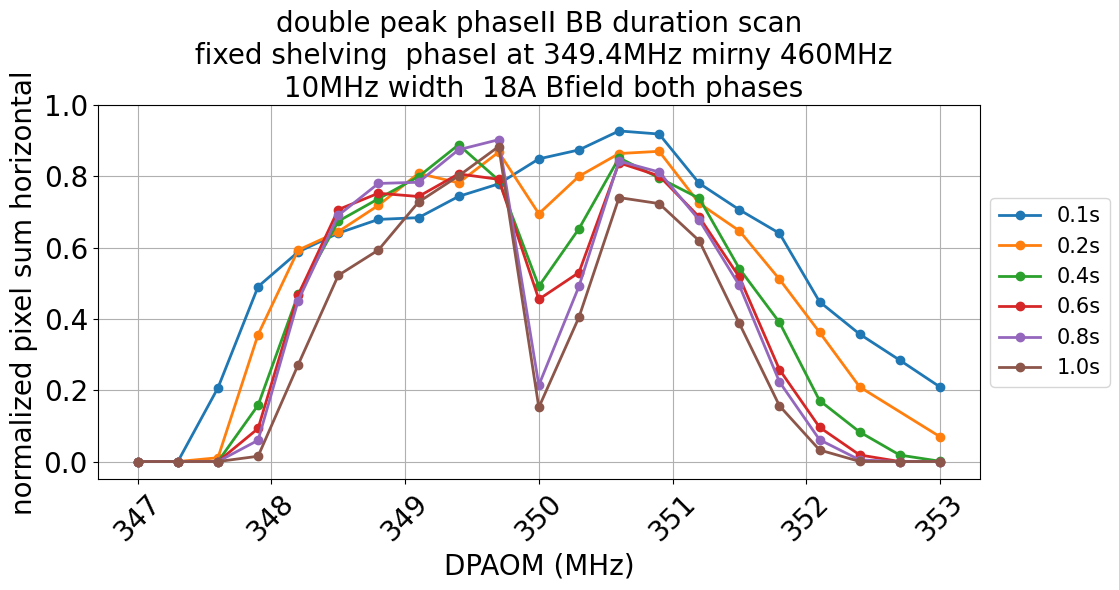

In [71]:

#x_data = np.delete(x_data, 13)
#y_data = np.delete(y_data, 13)
#x_data = (x_data/1e6) *2 +460 -100
plt.figure(figsize=(10, 6))
for i in range(len(x_list)):
    plt.plot(x_list[i]/1e6, y_list[i]/10, '.-', markersize=12, linewidth=2, label = label_list[i])  # Large dots and connected points
plt.title('double peak phaseII BB duration scan\n fixed shelving  phaseI at 349.4MHz mirny 460MHz\n 10MHz width  18A Bfield both phases', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=45)
plt.xlabel('DPAOM (MHz)', fontsize=20)
plt.ylabel('normalized pixel sum horizontal', fontsize=20)
#plt.xlim(340, 360)
plt.ylim(-0.05,1)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
plt.legend(fontsize=12)
# Place the legend outside the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

# Save the plot with 300 DPI
#plt.savefig('narrowband_normalizedpixelsum_vs_frequency_0OFFSET_20241013_2.png', dpi=300)

plt.show()

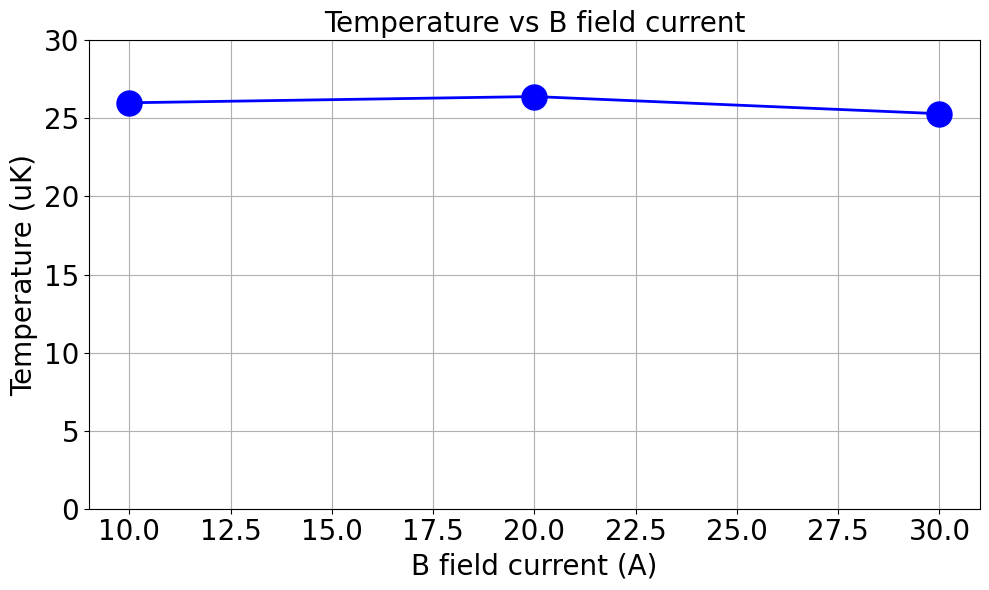

In [118]:
B = [10,20,30]
TuK = [26.0, 26.4, 25.3]
plt.figure(figsize=(10, 6))
plt.plot(B, TuK, 'o-', markersize=18, linewidth=2,color='blue')  # Large dots and connected points
plt.title('Temperature vs B field current', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('B field current (A)', fontsize=20)
plt.ylabel('Temperature (uK)', fontsize=20)
#plt.xlim(340, 360)
plt.ylim(0.0,30)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
# Save the plot with 300 DPI
#plt.savefig('atomtransfer_vs_amplitude_20241013.png', dpi=300)

plt.show()

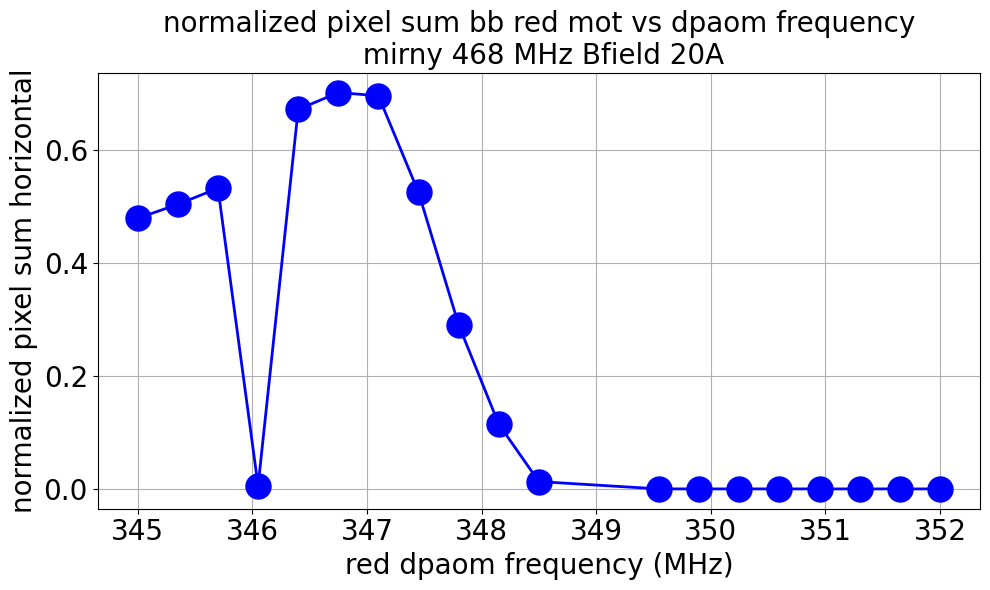

In [74]:
# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield25_mirny468II\000015831-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15831.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15831.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, 11)
y_data = np.delete(y_data, 11)
x_data = np.delete(x_data, 11)
y_data = np.delete(y_data, 11)
plt.figure(figsize=(10, 6))
plt.plot(x_data/1e6, y_data/10, 'o-', markersize=18, linewidth=2,color='blue')  # Large dots and connected points
plt.title('normalized pixel sum bb red mot vs dpaom frequency\n mirny 468 MHz Bfield 20A', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('red dpaom frequency (MHz)', fontsize=20)
plt.ylabel('normalized pixel sum horizontal', fontsize=20)
#plt.xlim(340, 360)
#plt.ylim(-0.05,0.5)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
# Save the plot with 300 DPI
#plt.savefig('atomtransfer_vs_amplitude_20241013.png', dpi=300)

plt.show()

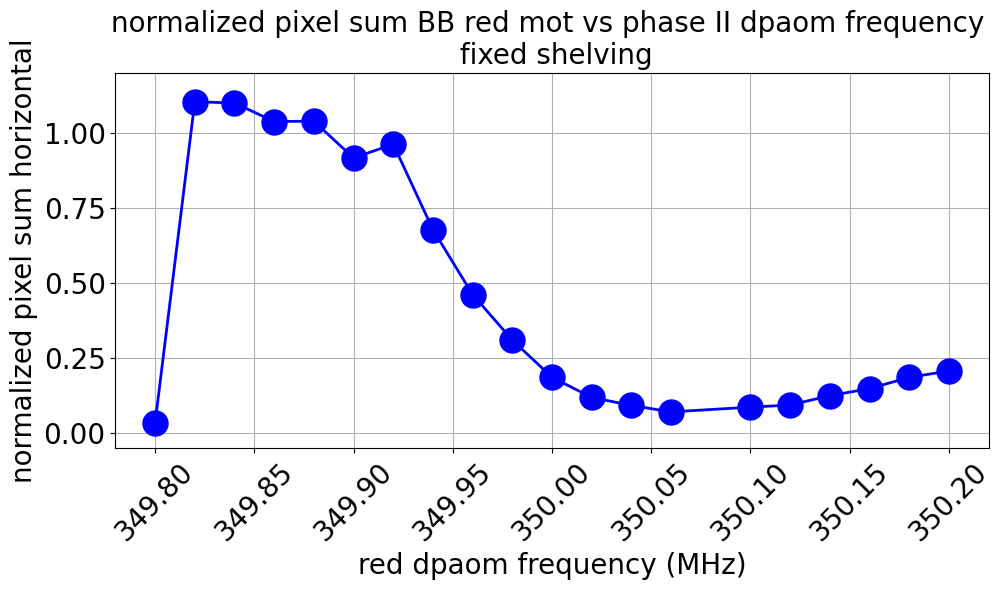

In [39]:
# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_fix_shelving_modulation_finescan\000015807-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15807.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15807.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, 14)
y_data = np.delete(y_data, 14)

plt.figure(figsize=(10, 6))
plt.plot(x_data/1e6, y_data/10, 'o-', markersize=18, linewidth=2,color='blue')  # Large dots and connected points
plt.title('normalized pixel sum BB red mot vs phase II dpaom frequency \n fixed shelving', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
plt.xlabel('red dpaom frequency (MHz)', fontsize=20)
plt.ylabel('normalized pixel sum horizontal', fontsize=20)
#plt.xlim(340, 360)
plt.ylim(-0.05,1.2)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
# Save the plot with 300 DPI
#plt.savefig('atomtransfer_vs_amplitude_20241013.png', dpi=300)

plt.show()

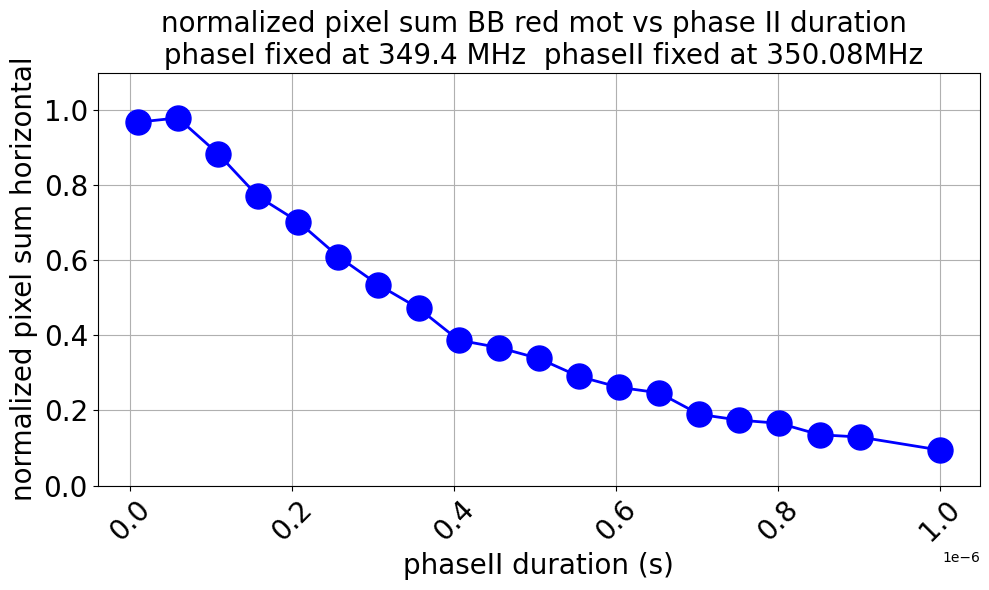

In [31]:
# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_phaseII_duration\000015803-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15803.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15803.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, -2)
y_data = np.delete(y_data, -2)

plt.figure(figsize=(10, 6))
plt.plot(x_data/1e6, y_data/10, 'o-', markersize=18, linewidth=2,color='blue')  # Large dots and connected points
plt.title('normalized pixel sum BB red mot vs phase II duration \n phaseI fixed at 349.4 MHz  phaseII fixed at 350.08MHz', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
plt.xlabel('phaseII duration (s)', fontsize=20)
plt.ylabel('normalized pixel sum horizontal', fontsize=20)
#plt.xlim(340, 360)
plt.ylim(-0.00,1.1)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
# Save the plot with 300 DPI
#plt.savefig('atomtransfer_vs_amplitude_20241013.png', dpi=300)

plt.show()

In [113]:
x_list = []
y_list = []
label_list = []
# file name and path
# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield10_mirny468II\000015830-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15830.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15830.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("10A")

file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield12_mirny468II\000015839-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15839.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15839.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("12A")


# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield13_mirny468II\000015836-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15836.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15836.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("13A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield14_mirny468II\000015837-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15837.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15837.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("14A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield15_mirny468II\000015835-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15835.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15835.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("15A")



# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield18_mirny468II\000015829-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15829.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15829.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("18A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield20_mirny468II\000015828-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15828.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15828.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

# Plotting the data#
#x_data = np.delete(x_data, 7)
#y_data = np.delete(y_data, 7)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("20A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield23_mirny468II\000015834-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15834.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15834.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, -2)
y_data = np.delete(y_data, -2)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("23A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield25_mirny468II\000015831-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15831.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15831.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, -2)
y_data = np.delete(y_data, -2)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("25A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield27_mirny468II\000015832-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15832.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15832.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, -2)
y_data = np.delete(y_data, -2)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("27A")

# file name and path
file_path = r"Z:\AION\Data\2024\10\17\ndscandata_doublepeak_secondpeak_Bfield30_mirny468II\000015827-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_15827.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_15827.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]
# Plotting the data#
x_data = np.delete(x_data, -2)
y_data = np.delete(y_data, -2)

x_list.append(x_data)
y_list.append(y_data)
label_list.append("30A")


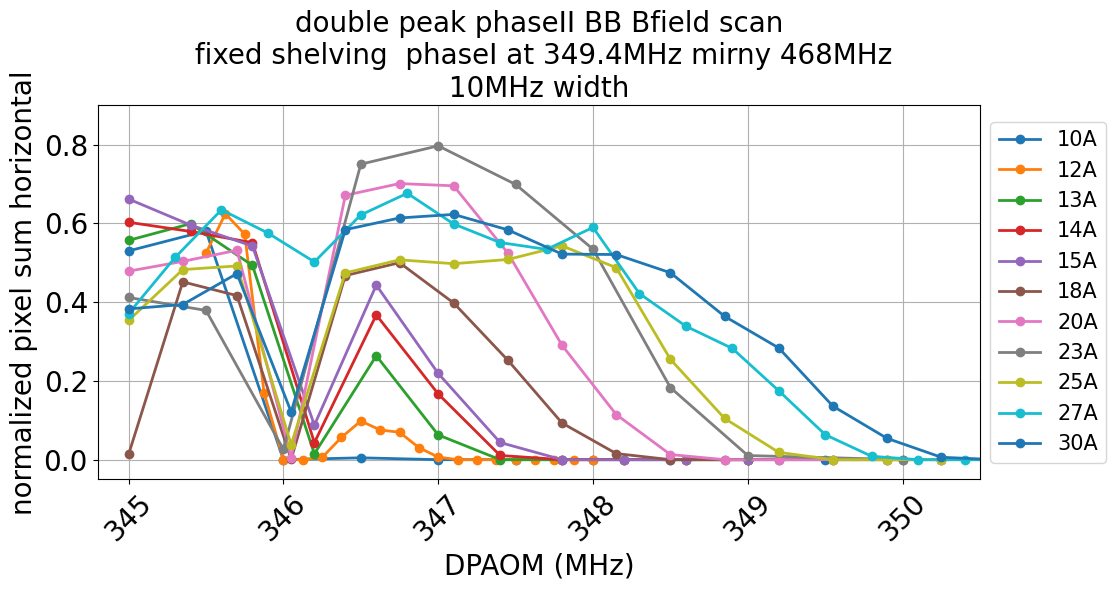

In [114]:

#x_data = np.delete(x_data, 13)
#y_data = np.delete(y_data, 13)
#x_data = (x_data/1e6) *2 +460 -100
plt.figure(figsize=(10, 6))
for i in range(len(x_list)):
    plt.plot(x_list[i]/1e6, y_list[i]/10, '.-', markersize=12, linewidth=2, label = label_list[i])  # Large dots and connected points
plt.title('double peak phaseII BB Bfield scan\n fixed shelving  phaseI at 349.4MHz mirny 468MHz\n 10MHz width ', fontsize=20)
# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=45)
plt.xlabel('DPAOM (MHz)', fontsize=20)
plt.ylabel('normalized pixel sum horizontal', fontsize=20)
plt.xlim(344.8, 350.5)
plt.ylim(-0.05,0.9)
plt.grid(True)
# Adjust layout to prevent cut off
plt.tight_layout()
plt.legend(fontsize=12)
# Place the legend outside the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)
#plt.legend(fontsize=18)
# Save the plot with 300 DPI
#plt.savefig('narrowband_normalizedpixelsum_vs_frequency_0OFFSET_20241013_2.png', dpi=300)

plt.show()